# 🧑‍🍳 Cooking up flavorful SWOTs with the kernel

In [1]:
import semantic_kernel as sk

from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion, OpenAIChatCompletion

from IPython.display import display, Markdown

kernel = sk.Kernel()

useAzureOpenAI = False

if useAzureOpenAI:
    deployment, api_key, endpoint = sk.azure_openai_settings_from_dot_env()
    kernel.add_text_completion_service("azureopenai", AzureChatCompletion(deployment, endpoint, api_key))
else:
    api_key, org_id = sk.openai_settings_from_dot_env()
    kernel.add_text_completion_service("openai", OpenAIChatCompletion("gpt-3.5-turbo-0301", api_key, org_id))

print("A kernel is now ready.")   

A kernel is now ready.


# Let's make a semantic function

In [2]:
sk_prompt = """
{{$input}}

Summarize the content above in less than 140 characters.
"""
summary_function = kernel.create_semantic_function(prompt_template = sk_prompt,
                                                    description="Summarizes the input to length of an old tweet.",
                                                    max_tokens=200,
                                                    temperature=0.1,
                                                    top_p=0.5)       
print("A semantic function for summarization has been registered.");

A semantic function for summarization has been registered.


In [3]:
sk_input = """
Let me illustrate an example. Many weekends, I drive a few minutes from my house to a local pizza store to buy 
a slice of Hawaiian pizza from the gentleman that owns this pizza store. And his pizza is great, but he always 
has a lot of cold pizzas sitting around, and every weekend some different flavor of pizza is out of stock. 
But when I watch him operate his store, I get excited, because by selling pizza, he is generating data. 
And this is data that he can take advantage of if he had access to AI.

AI systems are good at spotting patterns when given access to the right data, and perhaps an AI system could spot 
if Mediterranean pizzas sell really well on a Friday night, maybe it could suggest to him to make more of it on a 
Friday afternoon. Now you might say to me, "Hey, Andrew, this is a small pizza store. What's the big deal?" And I 
say, to the gentleman that owns this pizza store, something that could help him improve his revenues by a few 
thousand dollars a year, that will be a huge deal to him.
""";
# Text source: https://www.ted.com/talks/andrew_ng_how_ai_could_empower_any_business/transcript

summary_result = await kernel.run_async(summary_function, input_str=sk_input)

display(Markdown("### ✨ " + str(summary_result)))

### ✨ AI can help small businesses like a pizza store owner by analyzing data to spot patterns and improve revenue.

In [4]:
summary_result = summary_function(sk_input)

display(Markdown("### ✨ " + str(summary_result)))

### ✨ AI can help small businesses like a pizza store owner by analyzing data to spot patterns and improve revenue.

# Native functions

In [5]:
from semantic_kernel.skill_definition import (sk_function,sk_function_context_parameter,)

class ExoticLanguagePlugin:
    def word_to_pig_latin(self, word):
        vowels = "AEIOUaeiou"
        if word[0] in vowels:
            return word + "way"
        for idx, letter in enumerate(word):
            if letter in vowels:
                break
        else:
            return word + "ay"
        return word[idx:] + word[:idx] + "ay"
    @sk_function(description="Takes text and converts it to pig latin",name="pig_latin",
                 input_description="The text to convert to pig latin")
    def pig_latin(self, sentence:str) -> str:
        words = sentence.split()
        pig_latin_words = []
        for word in words:
            pig_latin_words.append(self.word_to_pig_latin(word))
        return ' '.join(pig_latin_words)

exotic_language_plugin = kernel.import_skill(ExoticLanguagePlugin(), skill_name="exotic_language_plugin")

pig_latin_function = exotic_language_plugin["pig_latin"]

print("this is kind of not going to feel awesome but know this is a big deal")


this is kind of not going to feel awesome but know this is a big deal


In [6]:
final_result = await kernel.run_async(summary_function, pig_latin_function, input_str=sk_input) 

display(Markdown("### ✨ " + str(final_result)))

### ✨ AIway ancay elphay allsmay usinessesbay ikelay away izzapay orestay ownerway byay analyzingway ataday otay otspay atternspay andway improveway evenue.ray

### ✨ AIway ancay elphay allsmay usinessesbay ikelay away izzapay orestay ownerway byay analyzingway ataday otay otspay atternspay andway improveway evenue.ray

[![](./assets/andrew_ng.jpg)](assets/thepizzastore720.mp4)


1. **Strengths**
    - What unique recipes or ingredients does the pizza shop use?
    - What are the skills and experience of the staff?
    - Does the pizza shop have a strong reputation in the local area?
    - Are there any unique features of the shop or its location that attract customers?
2. **Weaknesses**
    - What are the operational challenges of the pizza shop? (e.g., slow service, high staff turnover)
    - Are there financial constraints that limit growth or improvements?
    - Are there any gaps in the product offering?
    - Are there customer complaints or negative reviews that need to be addressed?
3. **Opportunities**
    - Is there potential for new products or services (e.g., catering, delivery)?
    - Are there under-served customer segments or market areas?
    - Can new technologies or systems enhance the business operations?
    - Are there partnerships or local events that can be leveraged for marketing?
4. **Threats**
    - Who are the major competitors and what are they offering?
    - Are there potential negative impacts due to changes in the local area (e.g., construction, closure of nearby businesses)?
    - Are there economic or industry trends that could impact the business negatively (e.g., increased ingredient costs)?
    - Is there any risk due to changes in regulations or legislation (e.g., health and safety, employment)?

| **Strengths**                                     | **Weaknesses**                                               |
| --- | --- |
| Unique garlic pizza recipe that wins top awards  | High staff turnover                                          |
| Owner trained in Sicily at some of the best pizzerias                          | Floods in the area damaged the seating areas that are in need of repair  |
| Strong local reputation                           | Absence of popular calzones from menu                        |
| Prime location on university campus               | Negative reviews from younger demographic for lack of hip ingredients |

Meanwhile there's money being left on the table (their opportunities) with calamities (their threats) waiting in the wings to possibly happen and may knock their pizza shop out cold.

### 🔖 Opportunities and Threats

| **Opportunities**                                 | **Threats**                                                  |
| --- | ---|
| Untapped catering potential                       | Rising competition from cheaper pizza businesses nearby |
| Growing local tech startup community              | There's nearby street construction that will impact foot traffic |
| Unexplored online presence and order capabilities | Rising cost of cheese                                        |
| Upcoming annual food fair                         | No immediate local regulatory changes but it's election season |

## 🤷 What does this have to do with LLMs and Semantic Kernel?

In [7]:
import semantic_kernel as sk
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion, OpenAIChatCompletion
from IPython.display import display, Markdown

kernel = sk.Kernel()

useAzureOpenAI = False

if useAzureOpenAI:
    deployment, api_key, endpoint = sk.azure_openai_settings_from_dot_env()
    kernel.add_text_completion_service("azureopenai", AzureChatCompletion(deployment, endpoint, api_key))
else:
    api_key, org_id = sk.openai_settings_from_dot_env()
    kernel.add_text_completion_service("openai", OpenAIChatCompletion("gpt-3.5-turbo-0301", api_key, org_id))
print("Made a kernel!")

Made a kernel!


In [8]:
swot_interview= """
1. **Strengths**
    - What unique recipes or ingredients does the pizza shop use?
    - What are the skills and experience of the staff?
    - Does the pizza shop have a strong reputation in the local area?
    - Are there any unique features of the shop or its location that attract customers?
2. **Weaknesses**
    - What are the operational challenges of the pizza shop? (e.g., slow service, high staff turnover)
    - Are there financial constraints that limit growth or improvements?
    - Are there any gaps in the product offering?
    - Are there customer complaints or negative reviews that need to be addressed?
3. **Opportunities**
    - Is there potential for new products or services (e.g., catering, delivery)?
    - Are there under-served customer segments or market areas?
    - Can new technologies or systems enhance the business operations?
    - Are there partnerships or local events that can be leveraged for marketing?
4. **Threats**
    - Who are the major competitors and what are they offering?
    - Are there potential negative impacts due to changes in the local area (e.g., construction, closure of nearby businesses)?
    - Are there economic or industry trends that could impact the business negatively (e.g., increased ingredient costs)?
    - Is there any risk due to changes in regulations or legislation (e.g., health and safety, employment)?"""


sk_prompt = """
{{$input}}

Convert the analysis provided above to the business domain of {{$domain}}.
"""
shift_domain_function = kernel.create_semantic_function(prompt_template=sk_prompt,
                                                    description="Translate an idea to another domain.",
                                                    max_tokens=1000,
                                                    temperature=0.1,
                                                    top_p=0.5)
my_context = kernel.create_new_context()

my_context['input'] = swot_interview
my_context['domain'] = "construction management"

result = await kernel.run_async(shift_domain_function, input_context=my_context)

display(Markdown(f"### ✨ Shift the SWOT interview questions to the world of {my_context['domain']}\n"+ str(result)))


### ✨ Shift the SWOT interview questions to the world of construction management
1. **Strengths**
    - What unique construction methods or materials does the company use?
    - What are the skills and experience of the construction team?
    - Does the company have a strong reputation in the local area?
    - Are there any unique features of the company or its projects that attract clients?
2. **Weaknesses**
    - What are the operational challenges of the company? (e.g., delays, budget overruns)
    - Are there financial constraints that limit growth or improvements?
    - Are there any gaps in the service offering?
    - Are there client complaints or negative reviews that need to be addressed?
3. **Opportunities**
    - Is there potential for new services or project types (e.g., green building, renovation)?
    - Are there under-served client segments or market areas?
    - Can new technologies or systems enhance the construction process?
    - Are there partnerships or local events that can be leveraged for marketing?
4. **Threats**
    - Who are the major competitors and what are they offering?
    - Are there potential negative impacts due to changes in the local area (e.g., zoning regulations, environmental concerns)?
    - Are there economic or industry trends that could impact the business negatively (e.g., increased material costs)?
    - Is there any risk due to changes in regulations or legislation (e.g., safety standards, building codes)?

### ✨ Shift the SWOT interview questions to the world of construction management

1.  **Strengths**
    -   What unique construction methods or materials does the company use?
    -   What are the skills and experience of the construction team?
    -   Does the company have a strong reputation in the local area?
    -   Are there any unique features of the company or its projects that attract clients?
2.  **Weaknesses**
    -   What are the operational challenges of the company? (e.g., delays, budget overruns)
    -   Are there financial constraints that limit growth or improvements?
    -   Are there any gaps in the service offering?
    -   Are there client complaints or negative reviews that need to be addressed?
3.  **Opportunities**
    -   Is there potential for new services or project types (e.g., green building, renovation)?
    -   Are there under-served client segments or market areas?
    -   Can new technologies or systems enhance the construction process?
    -   Are there partnerships or local events that can be leveraged for marketing?
4.  **Threats**
    -   Who are the major competitors and what are they offering?
    -   Are there potential negative impacts due to changes in the local area (e.g., zoning regulations, environmental concerns)?
    -   Are there economic or industry trends that could impact the business negatively (e.g., increased material costs)?
    -   Is there any risk due to changes in regulations or legislation (e.g., safety standards, building codes)?

In [9]:
sk_prompt = """
{{$input}}

Rewrite the text above to be understood by a {{$level}}.
"""
shift_reading_level_function = kernel.create_semantic_function(prompt_template=sk_prompt,
                                                    description="Change the reading level of a given text.",
                                                    max_tokens=1000,
                                                    temperature=0.1,
                                                    top_p=0.5)

my_context['input'] = swot_interview
my_context['domain'] = "construction management"
my_context["level"] = "child"

result = await kernel.run_async(shift_domain_function, shift_reading_level_function, input_context=my_context)

display(Markdown(f"### ✨ Shift the SWOT interview questions to the world of {my_context['domain']} at the level of {my_context['level']}\n"+ str(result)))

### ✨ Shift the SWOT interview questions to the world of construction management at the level of child
1. Good things:
- Does the company build things in a special way or with special materials?
- Are the people who work there really good at building things?
- Do people in the area like the company and think they do a good job?
- Does the company make things that are different and interesting?
2. Bad things:
- Does the company have problems with getting things done on time or staying within a budget?
- Does the company not have enough money to do things they want to do?
- Is there something the company doesn't do that people want them to do?
- Do people complain about the company or say bad things about them?
3. Good opportunities:
- Can the company start building new things or doing things in a different way?
- Are there people who want things built that the company isn't building right now?
- Can the company use new tools or machines to build things better?
- Are there events or groups the company can work with to get more people to know about them?
4. Bad things that could happen:
- Are there other companies that are better than the company and people might go to them instead?
- Are there rules or laws that might make it harder for the company to build things?
- Are things getting more expensive and the company might not be able to afford to build things?
- Are there new rules or laws that might make it harder for the company to build things safely?

### ✨ Shift the SWOT interview questions to the world of construction management at the level of child

1.  Good things:

-   Does the company build things in a special way or with special materials?
-   Are the people who work there really good at building things?
-   Do people in the area like the company and think they do a good job?
-   Does the company make things that are different and interesting?

2.  Bad things:

-   Does the company have problems with getting things done on time or staying within a budget?
-   Does the company not have enough money to do things they want to do?
-   Is there something the company doesn't do that people want them to do?
-   Do people complain about the company or say bad things about them?

3.  Good opportunities:

-   Can the company start building new things or doing things in a different way?
-   Are there people who want things built that the company isn't building right now?
-   Can the company use new tools or machines to build things better?
-   Are there events or groups the company can work with to get more people to know about them?

4.  Bad things that could happen:

-   Are there other companies that are better than the company and people might go to them instead?
-   Are there rules or laws that might make it harder for the company to build things?
-   Are things getting more expensive and the company might not be able to afford to build things?
-   Are there new rules or laws that might make it harder for the company to build things safely?

## 🔖 Reminder: All ✨ generative responses result from having the model fill in the _____.

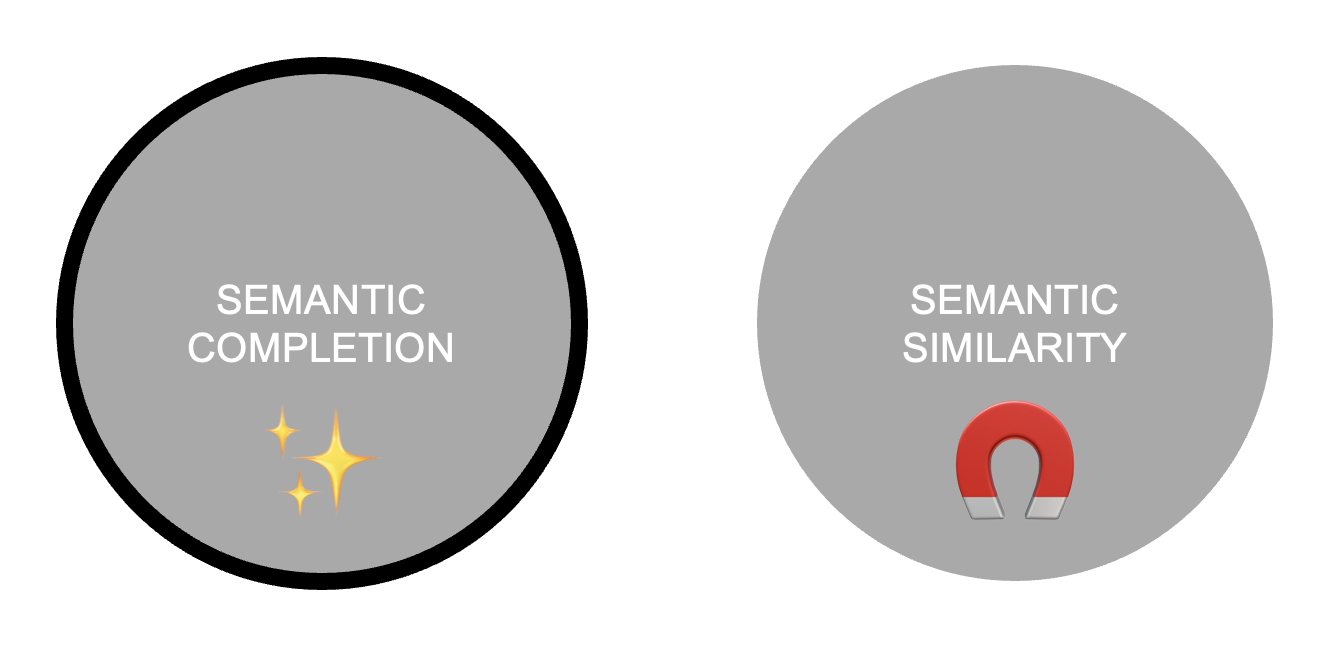